# Compare memory calculation codes

Since the initial release of `GWMemory` other packages to compute the waveform have been released.
For example, the `sxs` package has a method to compute memory.

In this notebook we compare the performance of the two packages for a test example.

*NOTE*: the sxs code includes additional memory terms beyond the dominant energy term considered here.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gwsurrogate as gws
from gwmemory import time_domain_memory as tdm
from gwtools import sxs_memory

%matplotlib inline

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


Create the time domain model. We do this with the `gwsurrogate package`.

For this case, we will use a binary with mass ratio 8 and large aligned spins.

In [2]:
model = gws.LoadSurrogate("NRHybSur3dq8")
chi0 = [0, 0, 0.8]
t = np.arange(-1000, 100, 0.01)
t, h, dyn = model(8, chi0, chi0, times=t, f_low=0)

Loaded NRHybSur3dq8 model


Compute the memory with the two packages.

For comparison, we record the time taken for each code.

In [3]:
%time h_mem, times = tdm(h_lm=h, times=t)
%time h_mem_sxs, times_sxs = sxs_memory(h, t)

CPU times: user 768 ms, sys: 224 ms, total: 991 ms
Wall time: 991 ms


CPU times: user 16 s, sys: 1.4 s, total: 17.4 s
Wall time: 17.3 s


Now we plot the various memory modes along with the overlaps.

/usr/share/miniconda/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


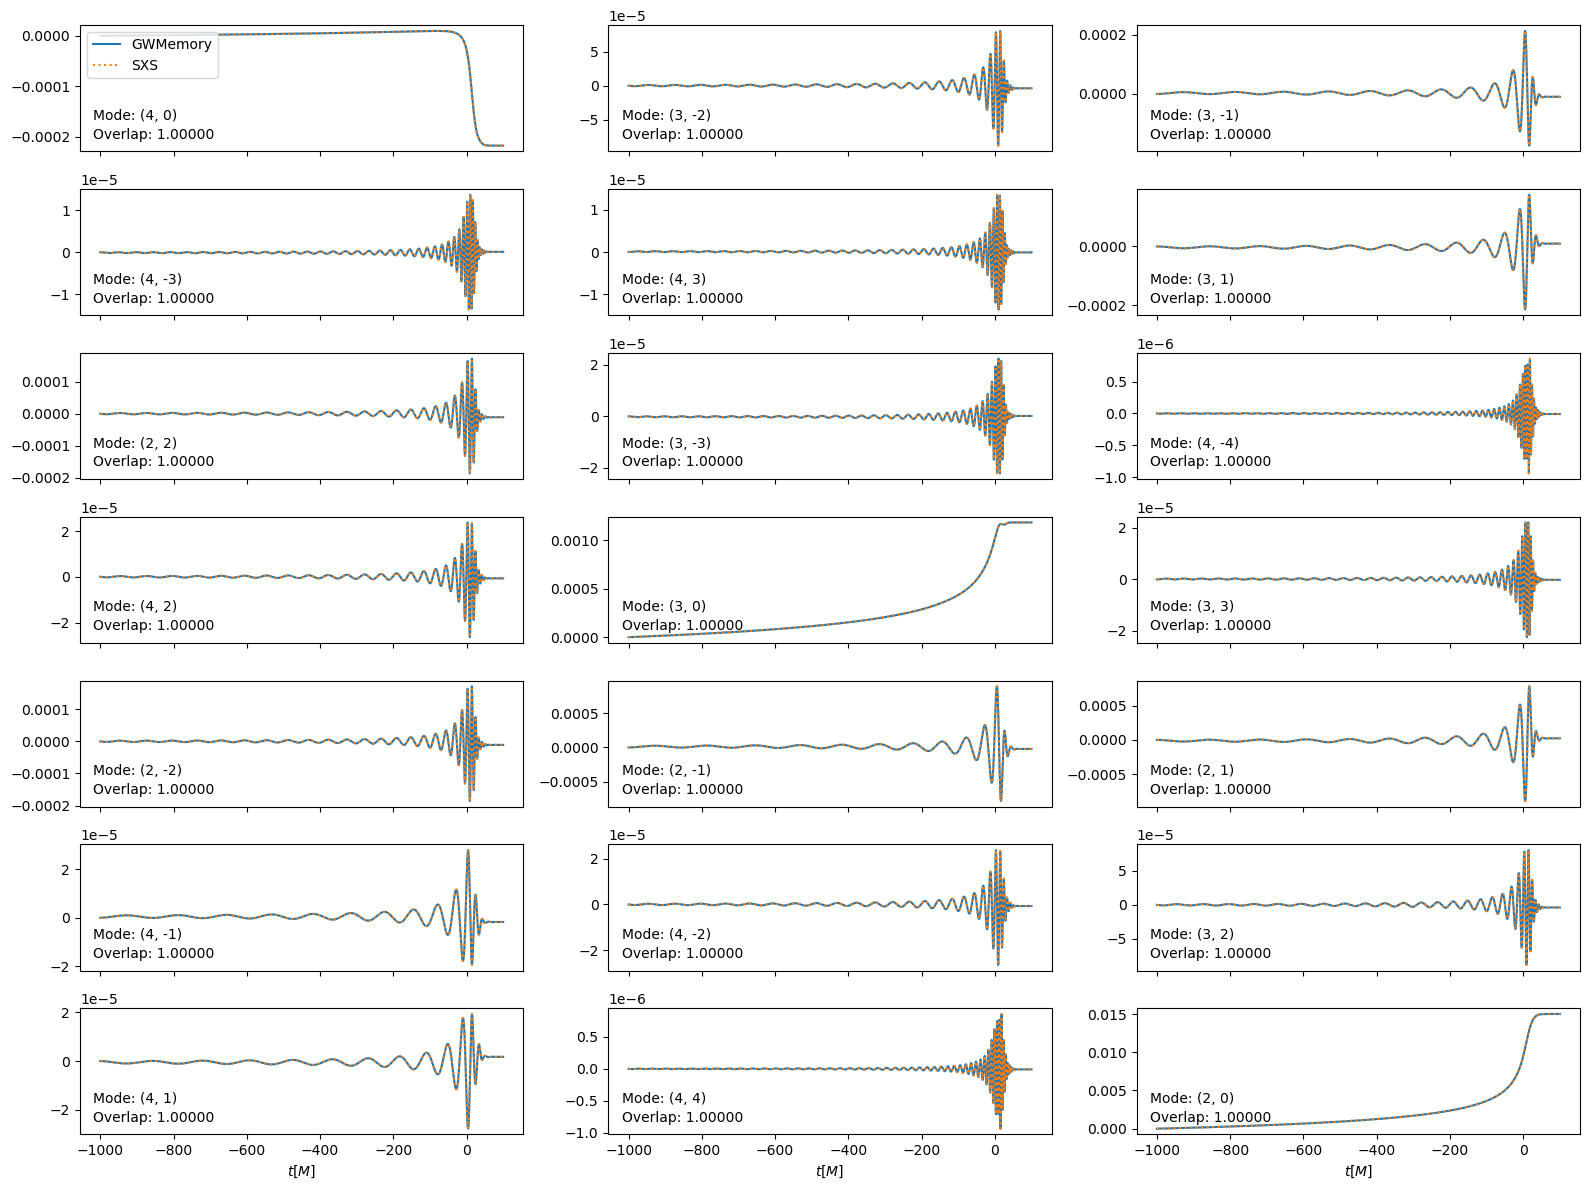

In [4]:
modes = set(h_mem.keys()).intersection(h_mem_sxs.keys())
fig, axes = plt.subplots(nrows=7, ncols=3, sharex=True, figsize=(16, 12))
for ii, mode in enumerate(modes):
    gwmem = h_mem[mode]
    sxsmem = h_mem_sxs[mode]
    overlap = np.vdot(gwmem, sxsmem) / np.vdot(gwmem, gwmem) ** 0.5 / np.vdot(sxsmem, sxsmem) ** 0.5

    ax = axes[ii // 3, ii % 3]
    ax.plot(times, h_mem[mode], label="GWMemory")
    ax.plot(times_sxs, h_mem_sxs[mode], linestyle=":", label="SXS")
    ax.annotate(f"Mode: ({mode[0]}, {mode[1]})", (0.03, 0.25), xycoords="axes fraction")
    ax.annotate(f"Overlap: {overlap.real:.5f}", (0.03, 0.1), xycoords="axes fraction")
axes[0, 0].legend(loc="upper left")
axes[-1, 0].set_xlabel("$t [M]$")
axes[-1, 1].set_xlabel("$t [M]$")
axes[-1, 2].set_xlabel("$t [M]$")
plt.tight_layout()
plt.show()
plt.close()